In [2]:
# run this cell
from datascience import *
from pandas import read_stata
import numpy as np
#from pygrowup import Calculator

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

data = Table.read_table('Lab_3.csv')
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,371.467
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,141.705
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,122.426
20111642,6,26,12,1999,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,90.2787
20111642,7,17,1,2000,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,89.5984
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,61.3525
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098
20113642,1,13,4,1966,41,1,-99,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,493.893
20113642,2,1,1,1969,38,2,-99,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,461.361


# Household Composition
In this lab, we are going to look at who is in the household, and see if household composition correlates with child growth.

Our first goal will be to make a pie graph that illustrates the sex and age composition of household members.  Make new columns that indicate what is the percentage of the household composed of young children girls ages 0-5, young children boys ages 0-5, girls ages 6-17, boys ages 6-17, women ages 18-59, men ages 18-59, elderly women ages 60+, and elderly men ages 60+.

For example, if the household is the following
>Barack 55

>Michelle 52

>Malia 18

>Sasha 15

>Marian 70

20% are men ages 18-59, 40% are women ages 18-59, 20% are girls ages 6-17, and 20% are women ages 60+.  All the other categories are 0%.


To do this calculatation, you will need to add up total number of people in the household, and then the total number of people in each category.

In [3]:
#This cell will take a while to run

def age_category(age):
    if age < 6:
        return 1
    elif age < 18:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

data['Age Category'] = data.apply(age_category, 'Years Old')
categories = data.pivot('Household ID', ['Age Category', 'Sex'])

household_table = Table(['Household ID', 'Boys 0-5', 'Girls 0-5', 'Boys 6-17', 'Girls 6-17', 'Men 18-59', 'Women 18-59', 'Men 60+', 'Women 60+'])
households = data.group('Household ID')['Household ID']
for household_id in households:
    household_data = categories[str(household_id)]
    num_members = sum(household_data)
    category_values = household_data/num_members
    household_table.append([household_id] + list(category_values))

data = data.join('Household ID', household_table)
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Age Category,Boys 0-5,Girls 0-5,Boys 6-17,Girls 6-17,Men 18-59,Women 18-59,Men 60+,Women 60+
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,371.467,3,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,141.705,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,122.426,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,6,26,12,1999,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,90.2787,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,7,17,1,2000,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,89.5984,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,61.3525,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20113642,1,13,4,1966,41,1,-99,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,493.893,3,0.285714,0.142857,0.285714,0,0.142857,0.142857,0,0
20113642,2,1,1,1969,38,2,-99,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,461.361,3,0.285714,0.142857,0.285714,0,0.142857,0.142857,0,0


Call the table that keeps just one row per household with these percentiles computed from the entire household.   
<font color="Blue"> Item 1: What would happen to our estimations of average household composition if we kept all rows?

<font color="Blue"> Item 2: Make a pie graph of the average percentages of people of these age categories in the household.  

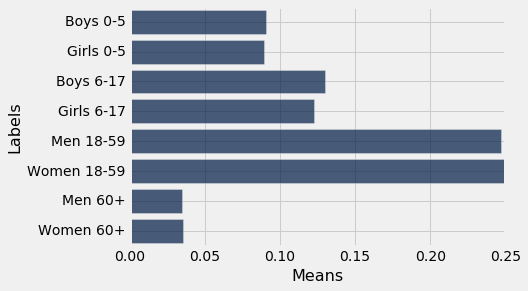

In [4]:
household_means = household_table.drop('Household ID').mean().row(0)

household_means_table = Table().with_column('Means', household_means).with_column('Labels', ['Boys 0-5', 'Girls 0-5', 'Boys 6-17', 'Girls 6-17', 'Men 18-59', 'Women 18-59', 'Men 60+', 'Women 60+'])
household_means_table.barh(column_for_categories='Labels')

(-1.0285640021670122,
 1.0000000008709264,
 -1.0306398787691256,
 1.0036630168167855)

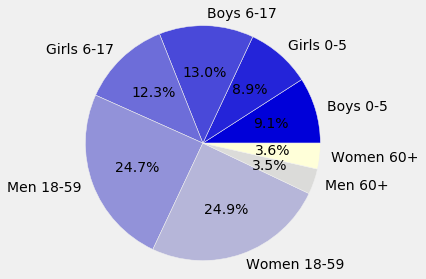

In [5]:
#This makes the pie chart
labels = household_means_table['Labels']
sizes = household_means_table['Means']
customcolormap = [(x/7.0,  x/7.0, 0.85) for x in range(len(household_means))]

plots.pie(sizes, labels=labels, colors=customcolormap, autopct='%1.1f%%')
plots.axis('equal')

As in the reading for today, let's see which of our households are nuclear families. We will make a new column indicating if the household is a "standard" nuclear family: contains father, mother, and children.  We will divide the making of this column into several steps in order to code this new column: we will make three new columns with true/false values and if all are true, then the final new column "Nuclear Family" will have a true value.

a) Determine that the household head has a spouse.

In [6]:
household_relations = data.pivot('Relationship to HH Head', 'Household ID')

has_spouse = Table().with_column('Household ID', household_relations['Household ID']).with_column('Head has Spouse', household_relations['2'] > 0)

household_relations.show(5)
has_spouse.show(5)

Household ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
20111642,0,0,0,0,7,0,0,0,1,0,0,0,0,0,0,0,0
20113642,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20114642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20118642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20119642,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Household ID,Head has Spouse
20111642,False
20113642,True
20114642,True
20118642,True
20119642,True


b) Determine if all the children in the family are children of the head. For this exercise, we will use the relation to the head column.  Next lab we will use the ids of mothers and fathers to work this out. 

In [7]:
#First we are going to see if each family has children
#Look back at has_spouse to see how to do this
has_children = Table().with_column('Household ID', household_relations['Household ID']).with_column('Has Children', household_relations['3'] > 0)
has_children

Household ID,Has Children
20111642,False
20113642,True
20114642,True
20118642,True
20119642,True
20121642,True
20122642,True
20123642,True
20124642,True
20125642,True


c) Determine there is no one else but these people in the household

In [10]:
household_relations

Household ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
20111642,0,0,0,16,7,0,0,0,1,0,0,0,0,0,0,0,0
20113642,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20114642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20118642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20119642,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20121642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20122642,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20123642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20124642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20125642,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
other_members = household_relations['4']
for i in range(5,10):
    other_members += household_relations[str(int(i))]
    
only_parents_and_children = other_members == 0

#is_nuclear['Only Parents And Children'] = only_parents_and_children
#is_nuclear

def family_is_nuclear(row):
    return row[1] and row[2]

#is_nuclear['Is Nuclear'] = is_nuclear.apply(family_is_nuclear)
#is_nuclear

d) Join the 'Is Nuclear' column from the is_nuclear table onto your main data table

In [ ]:
data = data.join('Household ID', is_nuclear)

<font color="Blue"> Item 3: What percentage of families are nuclear families?

In [ ]:
sum(is_nuclear['Is Nuclear'])/is_nuclear.num_rows

<font color="Blue"> Item 4: Among nuclear families, what is the average number of children?  Given the reading, what do these two statistics imply about your country's economic development?

In [ ]:
nuclear_family = data.where(data['Is Nuclear'])
nuclear_family_children = nuclear_family.where('Relationship to HH Head', 3)

nuclear_family_children.num_rows /  nuclear_family.group('Household ID').num_rows

Let's see if being in a nuclear family is associated with better child health outcomes.  For simplicity, let's just look at 3-year-olds.  
<font color="Blue"> Item 5: Compare average Height for age Z scores (HAZ) of 3-year-olds in nuclear families with 3-year-olds not in nuclear families.  Is this what you expected?  Explain why.

In [ ]:
not_nuclear_family = data.where(data['Is Nuclear'] == False)

nuclear_family_children.where('Age', 3)['z_score']

In some cases, larger families are associated with greater poverty.  However, some family members in large families may be more valuable to child health than others.  
<font color="Blue"> Item 6: Make a graph to compare the HAZ of children in families with no elderly women but elderly men to children in families with no elderly men but elderly women in the family.  

Child health can be related to income.  We might expect that a larger proportion of earners results in better child health.  On the other hand, we may also want to take into account that more people or children in the household might compete for consuming these resources.  

<font color="Blue"> Item 7: Propose a measure of household composition that takes at least these two considerations into account.  (example: ratio of children to adults).  Explain why you think this is a good mesaure to try.

<font color="Blue"> Item 8: Make a scatter plot of your measure with HAZ of 3-year-olds.  Did it come out as you expected?  If not, perhaps try a different measure.  If none come out as you expect, why do you think?  What other factors would you like to be able to take into account?

In [2]:
# run this cell
from datascience import *
from pandas import read_stata
import numpy as np
#from pygrowup import Calculator

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

data = Table.read_table('Lab_3.csv')
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,371.467
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,141.705
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,122.426
20111642,6,26,12,1999,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,90.2787
20111642,7,17,1,2000,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,89.5984
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,61.3525
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098
20113642,1,13,4,1966,41,1,-99,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,493.893
20113642,2,1,1,1969,38,2,-99,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,461.361


# Household Composition
In this lab, we are going to look at who is in the household, and see if household composition correlates with child growth.

Our first goal will be to make a pie graph that illustrates the sex and age composition of household members.  Make new columns that indicate what is the percentage of the household composed of young children girls ages 0-5, young children boys ages 0-5, girls ages 6-17, boys ages 6-17, women ages 18-59, men ages 18-59, elderly women ages 60+, and elderly men ages 60+.

For example, if the household is the following
>Barack 55

>Michelle 52

>Malia 18

>Sasha 15

>Marian 70

20% are men ages 18-59, 40% are women ages 18-59, 20% are girls ages 6-17, and 20% are women ages 60+.  All the other categories are 0%.


To do this calculatation, you will need to add up total number of people in the household, and then the total number of people in each category.

In [3]:
#This cell will take a while to run

def age_category(age):
    if age < 6:
        return 1
    elif age < 18:
        return 2
    elif age < 60:
        return 3
    else:
        return 4

data['Age Category'] = data.apply(age_category, 'Years Old')
categories = data.pivot('Household ID', ['Age Category', 'Sex'])

household_table = Table(['Household ID', 'Boys 0-5', 'Girls 0-5', 'Boys 6-17', 'Girls 6-17', 'Men 18-59', 'Women 18-59', 'Men 60+', 'Women 60+'])
households = data.group('Household ID')['Household ID']
for household_id in households:
    household_data = categories[str(household_id)]
    num_members = sum(household_data)
    category_values = household_data/num_members
    household_table.append([household_id] + list(category_values))

data = data.join('Household ID', household_table)
data

Household ID,Individual ID,Day of Birth,Month of Birth,Birth Year,Age in Years,Sex,Height,Weight,Relationship to HH Head,Mother ID,Father ID,Currently Enrolled in School,Years of Schooling - Level,Years of Schooling - Years,Master ID,Day of Interview,Month of Interview,Year of Interview,Days Old,Years Old,Months Old,Age Category,Boys 0-5,Girls 0-5,Boys 6-17,Girls 6-17,Men 18-59,Women 18-59,Men 60+,Women 60+
20111642,3,3,7,1976,31,2,-99,-99,9,-99,-99,-99,2,5,-1363194477,10,7,2007,11329.8,31.0404,371.467,3,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,4,10,9,1995,11,2,-99,-99,5,3,2,1,-99,-99,-1363194476,10,7,2007,4322,11.8411,141.705,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,5,20,4,1997,10,1,-99,-99,5,3,2,1,-99,-99,-1363194475,10,7,2007,3734,10.2301,122.426,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,6,26,12,1999,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194474,10,7,2007,2753.5,7.54384,90.2787,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,7,17,1,2000,7,1,-99,-99,5,3,2,-99,-99,-99,-1363194473,10,7,2007,2732.75,7.48699,89.5984,2,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,8,26,5,2002,5,1,105.9,22.6,5,3,2,-99,-99,-99,-1363194472,10,7,2007,1871.25,5.12671,61.3525,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,9,5,1,2005,2,2,80.5,9.5,5,3,2,-99,-99,-99,-1363194471,10,7,2007,918.5,2.51644,30.1148,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20111642,10,12,4,2006,1,2,70.3,7.1,5,3,2,-99,-99,-99,-1363194470,10,7,2007,454.75,1.24589,14.9098,1,0.125,0.25,0.375,0.125,0,0.125,0,0
20113642,1,13,4,1966,41,1,-99,-99,1,-99,-99,-99,-99,-99,-1361194479,10,7,2007,15063.8,41.2705,493.893,3,0.285714,0.142857,0.285714,0,0.142857,0.142857,0,0
20113642,2,1,1,1969,38,2,-99,-99,2,-99,-99,-99,-99,-99,-1361194478,10,7,2007,14071.5,38.5521,461.361,3,0.285714,0.142857,0.285714,0,0.142857,0.142857,0,0


Call the table that keeps just one row per household with these percentiles computed from the entire household.   
<font color="Blue"> Item 1: What would happen to our estimations of average household composition if we kept all rows?

[HELLO](#the pie chart)

<font color="Blue"> Item 2: Make a pie graph of the average percentages of people of these age categories in the household.  

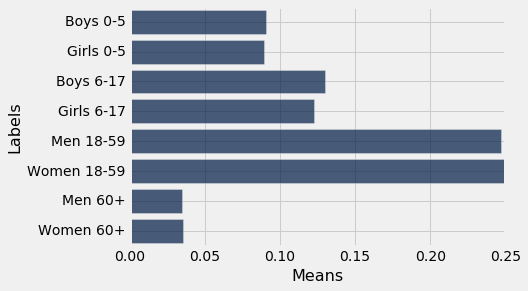

In [4]:
household_means = household_table.drop('Household ID').mean().row(0)

household_means_table = Table().with_column('Means', household_means).with_column('Labels', ['Boys 0-5', 'Girls 0-5', 'Boys 6-17', 'Girls 6-17', 'Men 18-59', 'Women 18-59', 'Men 60+', 'Women 60+'])
household_means_table.barh(column_for_categories='Labels')

(-1.0285640021670122,
 1.0000000008709264,
 -1.0306398787691256,
 1.0036630168167855)

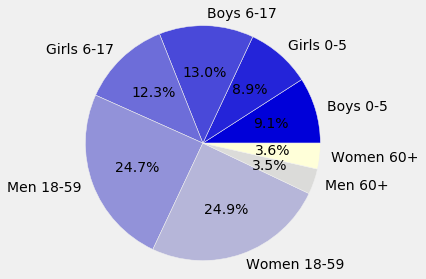

In [5]:
#This makes the pie chart
labels = household_means_table['Labels']
sizes = household_means_table['Means']
customcolormap = [(x/7.0,  x/7.0, 0.85) for x in range(len(household_means))]

plots.pie(sizes, labels=labels, colors=customcolormap, autopct='%1.1f%%')
plots.axis('equal')

As in the reading for today, let's see which of our households are nuclear families. We will make a new column indicating if the household is a "standard" nuclear family: contains father, mother, and children.  We will divide the making of this column into several steps in order to code this new column: we will make three new columns with true/false values and if all are true, then the final new column "Nuclear Family" will have a true value.

a) Determine that the household head has a spouse.

<a id="the pie chart"></a>

In [6]:
household_relations = data.pivot('Relationship to HH Head', 'Household ID')

has_spouse = Table().with_column('Household ID', household_relations['Household ID']).with_column('Head has Spouse', household_relations['2'] > 0)

household_relations.show(5)
has_spouse.show(5)

Household ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
20111642,0,0,0,0,7,0,0,0,1,0,0,0,0,0,0,0,0
20113642,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20114642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20118642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20119642,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Household ID,Head has Spouse
20111642,False
20113642,True
20114642,True
20118642,True
20119642,True


b) Determine if all the children in the family are children of the head. For this exercise, we will use the relation to the head column.  Next lab we will use the ids of mothers and fathers to work this out. 

In [7]:
#First we are going to see if each family has children
#Look back at has_spouse to see how to do this
has_children = Table().with_column('Household ID', household_relations['Household ID']).with_column('Has Children', household_relations['3'] > 0)
has_children

Household ID,Has Children
20111642,False
20113642,True
20114642,True
20118642,True
20119642,True
20121642,True
20122642,True
20123642,True
20124642,True
20125642,True


c) Determine there is no one else but these people in the household

In [10]:
household_relations

Household ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
20111642,0,0,0,16,7,0,0,0,1,0,0,0,0,0,0,0,0
20113642,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20114642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20118642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20119642,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20121642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20122642,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20123642,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20124642,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20125642,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
other_members = household_relations['4']
for i in range(5,10):
    other_members += household_relations[str(int(i))]
    
only_parents_and_children = other_members == 0

#is_nuclear['Only Parents And Children'] = only_parents_and_children
#is_nuclear

def family_is_nuclear(row):
    return row[1] and row[2]

#is_nuclear['Is Nuclear'] = is_nuclear.apply(family_is_nuclear)
#is_nuclear

d) Join the 'Is Nuclear' column from the is_nuclear table onto your main data table

In [ ]:
data = data.join('Household ID', is_nuclear)

<font color="Blue"> Item 3: What percentage of families are nuclear families?

In [ ]:
sum(is_nuclear['Is Nuclear'])/is_nuclear.num_rows

<font color="Blue"> Item 4: Among nuclear families, what is the average number of children?  Given the reading, what do these two statistics imply about your country's economic development?

In [ ]:
nuclear_family = data.where(data['Is Nuclear'])
nuclear_family_children = nuclear_family.where('Relationship to HH Head', 3)

nuclear_family_children.num_rows /  nuclear_family.group('Household ID').num_rows

Let's see if being in a nuclear family is associated with better child health outcomes.  For simplicity, let's just look at 3-year-olds.  
<font color="Blue"> Item 5: Compare average Height for age Z scores (HAZ) of 3-year-olds in nuclear families with 3-year-olds not in nuclear families.  Is this what you expected?  Explain why.

In [ ]:
not_nuclear_family = data.where(data['Is Nuclear'] == False)

nuclear_family_children.where('Age', 3)['z_score']

In some cases, larger families are associated with greater poverty.  However, some family members in large families may be more valuable to child health than others.  
<font color="Blue"> Item 6: Make a graph to compare the HAZ of children in families with no elderly women but elderly men to children in families with no elderly men but elderly women in the family.  

Child health can be related to income.  We might expect that a larger proportion of earners results in better child health.  On the other hand, we may also want to take into account that more people or children in the household might compete for consuming these resources.  

<font color="Blue"> Item 7: Propose a measure of household composition that takes at least these two considerations into account.  (example: ratio of children to adults).  Explain why you think this is a good mesaure to try.

<font color="Blue"> Item 8: Make a scatter plot of your measure with HAZ of 3-year-olds.  Did it come out as you expected?  If not, perhaps try a different measure.  If none come out as you expect, why do you think?  What other factors would you like to be able to take into account?